# Data Aggregation and Group Operations

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [3]:
pd.options.display.notebook_repr_html = False

In [4]:
%matplotlib inline

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## GroupBy mechanics

그룹연산 split-apply-combine (분리, 적용, 결합)

* apply
    - aggregation : df -> series -> scala 로 차원이 줄어듬 (연산이 2개인경우 줄지 않을 수 있다.)
    - transformation : group-secific computations : data 에 단항 연산을 적용 
    - filtration : 조건에 맞는것을 골라냄 
    
    
* combine
    df <- series <- scala
    
    
* 그룹의 인덱스 -> 결과의 인덱스를 구성 <br>
    같은 것끼리 모을떄 key가 될수 있는 것들<br>
    (리스트, 배열, 컬럼명, 사전, Series 객체, 축 인덱스, 인덱스 함수) 조합
    

* groupby 객체 <br>
    iter 객체를 가지고 있음 
    

* groupby() 의 by 인자 <br>
    mapper 또는 컬럼 이름으로 묶기 <br>
    function, dic, Series, ndarray, str, list of strs
    
    
* groupby() 의 level 인자 <br>
    level 을 index 로 묶기 

In [6]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randint(10, size=5),
                'data2' : np.random.randint(10, size=5)}) 
                # randint(10, size=5) 정수로 변경 

df # 사전으로 만들면 컬럼명이 정렬되서 나옴 

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [7]:
grouped = df['data1'].groupby(df['key1'])
grouped
grouped1 = df.data1.groupby(df.key1)
grouped1

In [8]:
type(df['data1'])
type(df[['data1']])

pandas.core.series.Series

pandas.core.frame.DataFrame

In [9]:
grouped.mean()

key1
a    5.333333
b    2.500000
Name: data1, dtype: float64

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     5.5
      two     5.0
b     one     1.0
      two     4.0
Name: data1, dtype: float64

In [11]:
means.unstack()

key2  one  two
key1          
a     5.5  5.0
b     1.0  4.0

In [12]:
df
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

California  2005    5
            2006    1
Ohio        2005    3
            2006    9
Name: data1, dtype: int32

In [13]:
df.groupby('key1').mean() # 수치값의 평균

         data1     data2
key1                    
a     5.333333  2.666667
b     2.500000  3.500000

In [14]:
df.groupby(['key1', 'key2']).mean()

           data1  data2
key1 key2              
a    one     5.5    3.0
     two     5.0    2.0
b    one     1.0    1.0
     two     4.0    6.0

In [15]:
# 원소 개수를 구함 
df.groupby(['key1', 'key2']).size() 

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups

그룹 순회

In [16]:
df
# group 의 이름이 a, b 
for name, group in df.groupby('key1'):
    print(name)
    print(group)

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

a
   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
4      9      1    a  one
b
   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two


In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print('\r', group)

('a', 'one')
    data1  data2 key1 key2
0      2      5    a  one
4      9      1    a  one
('a', 'two')
    data1  data2 key1 key2
1      5      2    a  two
('b', 'one')
    data1  data2 key1 key2
2      1      1    b  one
('b', 'two')
    data1  data2 key1 key2
3      4      6    b  two


In [18]:
# [(a,   data1  data2 key1 key2), (a,   data1  data2 key1 key2)] 튜플 리스트
list(df.groupby('key1'))

[('a',    data1  data2 key1 key2
  0      2      5    a  one
  1      5      2    a  two
  4      9      1    a  one), ('b',    data1  data2 key1 key2
  2      1      1    b  one
  3      4      6    b  two)]

In [19]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

   data1  data2 key1 key2
2      1      1    b  one
3      4      6    b  two

In [20]:
df.dtypes
df

data1     int32
data2     int32
key1     object
key2     object
dtype: object

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [21]:
# Series df.dtypes 를 key 로 axis=1 컬럼을 기준으로 묶음 
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('int32'):    data1  data2
 0      2      5
 1      5      2
 2      1      1
 3      4      6
 4      9      1, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [22]:
s1 = df.dtypes[[3,0,1,2]]
s1
grouped = df.groupby(s1, axis=1)
dict(list(grouped))

key2     object
data1     int32
data2     int32
key1     object
dtype: object

{dtype('int32'):    data1  data2
 0      2      5
 1      5      2
 2      1      1
 3      4      6
 4      9      1, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

In [23]:
df
df.groupby('key1')['data1'] # series 
df.groupby('key1')[['data2']] # dataframe 컬럼이 한개

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [24]:
# 이렇게 써도 위와 같음
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [25]:
df.groupby(['key1', 'key2'])[['data2']].mean() #dataframe

           data2
key1 key2       
a    one       3
     two       2
b    one       1
     two       6

In [26]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped #series

In [27]:
# DF 인덱스에 대한 이름이 있음 2차원 데이터 Name: data2, dtype: int32
s_grouped.mean()

key1  key2
a     one     3
      two     2
b     one     1
      two     6
Name: data2, dtype: int32

### Grouping with dicts and Series

In [28]:
people = DataFrame(np.random.randint(3, size=(5, 5)),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   )
people.loc[2:3, ['b', 'c']] = np.nan # 4 개가 na 로 변경됨 
people

   a    b    c  d  e
0  2  1.0  2.0  0  2
1  1  1.0  2.0  1  2
2  2  NaN  NaN  1  1
3  0  NaN  NaN  0  1
4  2  1.0  1.0  2  1

2:3 인덱스의 label 이 3 까지 추출 포함

In [29]:
people = DataFrame(np.random.randint(3, size=(5,5)), #np.random.randn(5, 5)
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

2:3 이 위치값으로 인식되어 3 을 제외한 값까지만 들어감 

In [30]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

'a': 'red', 'b': 'red', 'e': 'red' -> red 로 묶음 <br>
'd': 'blue', 'c': 'blue' -> blue 로 묶음 

In [31]:
by_column = people.groupby(mapping, axis=1)
list(by_column)
by_column.size()
by_column.sum()

[('blue',           c  d
  Joe     2.0  0
  Steve   0.0  2
  Wes     NaN  0
  Jim     2.0  1
  Travis  1.0  2), ('red',         a    b  e
  Joe     0  1.0  1
  Steve   0  2.0  0
  Wes     0  NaN  2
  Jim     0  0.0  2
  Travis  2  2.0  2)]

blue    2
red     3
dtype: int64

        blue  red
Joe      2.0  2.0
Steve    2.0  2.0
Wes      0.0  2.0
Jim      3.0  2.0
Travis   3.0  6.0

In [32]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [33]:
people.groupby(map_series, axis=1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

### Grouping with functions

In [34]:
people

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

In [35]:
# len : dataframe 의 index이름에 length 가 같은값 
people.groupby(len).sum()
# axis 를 1 로 주면 a,b,c,d
people.T.groupby(len, axis=1).sum()
people.groupby(len, axis=1).sum()

   a    b    c  d  e
3  0  1.0  4.0  1  5
5  0  2.0  0.0  2  0
6  2  2.0  1.0  2  2

     3    5    6
a  0.0  0.0  2.0
b  1.0  2.0  2.0
c  4.0  0.0  1.0
d  1.0  2.0  2.0
e  5.0  0.0  2.0

          1
Joe     4.0
Steve   4.0
Wes     2.0
Jim     5.0
Travis  9.0

In [36]:
# 계층 인덱스 복합키
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

       a    b    c  d  e
3 one  0  1.0  2.0  0  1
  two  0  0.0  2.0  1  2
5 one  0  2.0  0.0  2  0
6 two  2  2.0  1.0  2  2

In [37]:
# 3, 5, 3, 3, 6 
people.groupby([len, 'd']).min()

     a    b    c  e
  d                
3 0  0  1.0  2.0  1
  1  0  0.0  2.0  2
5 2  0  2.0  0.0  0
6 2  2  2.0  1.0  2

### Grouping by index levels

In [38]:
# 멀티 인덱스 상위레벨의 포지션 값을 label 을 줌 
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
columns
hier_df = DataFrame(np.random.randint(20, size=(4, 5)), columns=columns)
hier_df

# 'US', 'US', 'US' (1,3,5) / 'JP', 'JP' (1, 3)
# row 의 index 는 지정하지 않음 

MultiIndex(levels=[['JP', 'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=['cty', 'tenor'])

cty    US          JP    
tenor   1   3   5   1   3
0       7  17   0  12  14
1      11   3   0   3   0
2       6   2  17  12   5
3       8  11   1   0   5

In [39]:
# index level city (us, jp) 그룹핑 방향이 컬럼을 옮기는 순
hier_df.groupby(level='cty', axis=1).count() # null 값 제외 

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

데이터 집계

In [40]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [41]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9) # 상위 90%
# == grouped.quantile(0.9)['data1'] 

key1
a    8.2
b    3.7
Name: data1, dtype: float64

값이 너무 없는 경우 중앙값을 연산으로 구할 수 있다. <br>
예) 값이 3개인 경우 2, 3, 9 : 4*4/5 = 15/5 = 8.2

quantitle : 양<br>
quartile : 4 분위수 

차원을 줄여주려면 aggregate 사용 그렇지 않으면 transform 

In [42]:
# 배열을 받아서 dataframe 으로 
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.head()
# DataFrameGoupby 의 method 
grouped.agg(peak_to_peak) # DF -> Series 함수를 적용해서 집계 해라 (그룹마다 적용됨) 
# Groupby 객체 의 aggregate method
grouped.aggregate(peak_to_peak) # key2는 문자라 제외

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

      data1  data2
key1              
a         7      4
b         3      5

      data1  data2
key1              
a         7      4
b         3      5

In [43]:
grouped.describe()

     data1                                                data2            \
     count      mean       std  min   25%  50%   75%  max count      mean   
key1                                                                        
a      3.0  5.333333  3.511885  2.0  3.50  5.0  7.00  9.0   3.0  2.666667   
b      2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  3.500000   

                                           
           std  min   25%  50%   75%  max  
key1                                       
a     2.081666  1.0  1.50  2.0  3.50  5.0  
b     3.535534  1.0  2.25  3.5  4.75  6.0  

In [45]:
tips = pd.read_csv('data/ch08/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill'] # tip 비율 
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

### Column-wise and multiple function application

In [46]:
grouped = tips.groupby(['sex', 'smoker'])
for (sex, smoker), group in grouped:
    print(sex, smoker)
    print(group)

Female No
     total_bill   tip     sex smoker   day    time  size   tip_pct
0         16.99  1.01  Female     No   Sun  Dinner     2  0.059447
4         24.59  3.61  Female     No   Sun  Dinner     4  0.146808
11        35.26  5.00  Female     No   Sun  Dinner     4  0.141804
14        14.83  3.02  Female     No   Sun  Dinner     2  0.203641
16        10.33  1.67  Female     No   Sun  Dinner     3  0.161665
18        16.97  3.50  Female     No   Sun  Dinner     3  0.206246
21        20.29  2.75  Female     No   Sat  Dinner     2  0.135535
22        15.77  2.23  Female     No   Sat  Dinner     2  0.141408
29        19.65  3.00  Female     No   Sat  Dinner     2  0.152672
32        15.06  3.00  Female     No   Sat  Dinner     2  0.199203
33        20.69  2.45  Female     No   Sat  Dinner     4  0.118415
37        16.93  3.07  Female     No   Sat  Dinner     3  0.181335
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
52        34.81  5.20  Female     No   Sun  Dinner  

In [47]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [48]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [49]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [50]:
# 두개 값에 대해서 'count', 'mean', 'max' 값들을 구함 
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [51]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [52]:
# 튜플을 만듬 
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [53]:
# 컬럼당 함수가 한개씩만 적용 
grouped.agg({'tip' : np.max, 'size' : 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [54]:
# 계층적 
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning aggregated data in "unindexed" form

In [55]:
tips.groupby(['sex', 'smoker'], as_index=False).mean() # as_index=False index 로 안만들겠다. 

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

* 여성 비흡연자/흡연자, 남성 비흡연자/흡연자 별 팁 비율 막대 그래프 

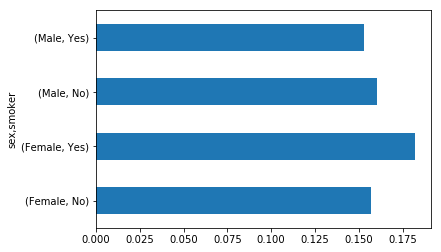

In [56]:
# Series 객체를 이용
tips.groupby(['sex', 'smoker'])['tip_pct'].mean().plot(kind='barh')
#grouped_pct.mean().plot(kind='bar')

* 여성/남성 흡연/비흡연자의 음식값과 팁 비율에 대한 산포도

In [57]:
tips[:5]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808

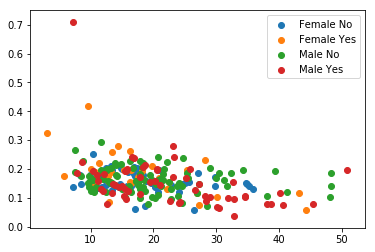

In [58]:
g = tips.groupby(['sex', 'smoker'])
#g.groups
#g.get_group(('Male', 'Yes'))

for i in g.groups:
    # print(i)
    # g.get_group(i)['total_bill'].plot(style='.')
    # g.get_group(i)['tip'].plot(style='.')
    plt.scatter(y=g.get_group(i)['tip_pct'], x=g.get_group(i)['total_bill'], label=str(' '.join(i)))
plt.legend()

In [59]:
# tips.groupby(['sex', 'smoker'])['total_bill', 'tip_pct'].plot(style='.')#.plot(kind='scatter')
# type(tmp)

## Group-wise operations and transformations

In [60]:
df

   data1  data2 key1 key2
0      2      5    a  one
1      5      2    a  two
2      1      1    b  one
3      4      6    b  two
4      9      1    a  one

In [61]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       5.333333    2.666667
b       2.500000    3.500000

In [62]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

   data1  data2 key1 key2  mean_data1  mean_data2
0      2      5    a  one    5.333333    2.666667
1      5      2    a  two    5.333333    2.666667
4      9      1    a  one    5.333333    2.666667
2      1      1    b  one    2.500000    3.500000
3      4      6    b  two    2.500000    3.500000

In [63]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a    b    c         d         e
one  0.666667  1.5  1.5  0.666667  1.666667
two  0.000000  1.0  1.0  1.500000  1.000000

In [64]:
people
# 원본에 mean 값을 적용 그룹에 대한 평균값 
people.groupby(key).transform(np.mean)

        a    b    c  d  e
Joe     0  1.0  2.0  0  1
Steve   0  2.0  0.0  2  0
Wes     0  NaN  NaN  0  2
Jim     0  0.0  2.0  1  2
Travis  2  2.0  1.0  2  2

               a    b    c         d         e
Joe     0.666667  1.5  1.5  0.666667  1.666667
Steve   0.000000  1.0  1.0  1.500000  1.000000
Wes     0.666667  1.5  1.5  0.666667  1.666667
Jim     0.000000  1.0  1.0  1.500000  1.000000
Travis  0.666667  1.5  1.5  0.666667  1.666667

In [65]:
# 사용자 정의 함수 적용 
def demean(arr):
    return arr - arr.mean() # 그룹의 평균을 뻄
demeaned = people.groupby(key).transform(demean)
demeaned

               a    b    c         d         e
Joe    -0.666667 -0.5  0.5 -0.666667 -0.666667
Steve   0.000000  1.0 -1.0  0.500000 -1.000000
Wes    -0.666667  NaN  NaN -0.666667  0.333333
Jim     0.000000 -1.0  1.0 -0.500000  1.000000
Travis  1.333333  0.5 -0.5  1.333333  0.333333

In [66]:
demeaned.groupby(key).mean()

                a    b    c             d             e
one  7.401487e-17  0.0  0.0  7.401487e-17 -7.401487e-17
two  0.000000e+00  0.0  0.0  0.000000e+00  0.000000e+00

### Apply: General split-apply-combine

In [67]:
# 데이터프레임을 컬럼으로 정렬한 후 오름차순의 끝에서 5개
def top(df, n=5, column='tip_pct'):
    #return df.sort_index(by=column)[-n:]
    return df.sort_values(by=column)[-n:] 
top(tips, n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [68]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [69]:
# apply 에서 top 함수를 호출 인자를 전달
tips.groupby(['smoker', 'day']).apply(top, n=2, column='total_bill') 
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill') # n=1 키워드 상위 1명 

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes  

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [70]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [71]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [72]:
# tips.groupby('smoker')['tip_pct'].describe() 내부적으로 아래와 같이 수행된다. 
f = lambda x: x.describe()
# tips.groupby('smoker')['tip_pct'].apply(f).unstak()
grouped.apply(f)

                     total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.

transfrom : 입력, 출력 개수가 같아야 함 

#### Suppressing the group keys

In [73]:
tips.groupby('smoker', group_keys=False).apply(top) # smoker 를 키로 하지 않겠다.

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

qcut() 값이 동등하게 들어감 <br>
groupby(factor 객체) 넣어서 범위로 묶음 <br>
apply() 함수 적용 

In [74]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4) # 똑같은 간격 4개 # 깡통 범위 
factor[:10] 

0    (0.0912, 1.972]
1    (-3.679, -1.79]
2    (-1.79, 0.0912]
3    (-1.79, 0.0912]
4    (0.0912, 1.972]
5    (0.0912, 1.972]
6    (0.0912, 1.972]
7    (-1.79, 0.0912]
8    (0.0912, 1.972]
9    (0.0912, 1.972]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.679, -1.79] < (-1.79, 0.0912] < (0.0912, 1.972] < (1.972, 3.853]]

In [75]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.groups

{Interval(-3.6789999999999998, -1.79, closed='right'): Int64Index([  1,  10,  58, 107, 159, 190, 258, 271, 316, 319, 323, 328, 333,
             358, 433, 592, 599, 600, 614, 640, 661, 672, 700, 705, 989],
            dtype='int64'),
 Interval(-1.79, 0.091200000000000003, closed='right'): Int64Index([  2,   3,   7,  11,  12,  14,  15,  16,  18,  20,
             ...
             983, 984, 985, 986, 991, 993, 994, 995, 996, 997],
            dtype='int64', length=499),
 Interval(0.091200000000000003, 1.972, closed='right'): Int64Index([  0,   4,   5,   6,   8,   9,  13,  17,  19,  21,
             ...
             972, 974, 975, 980, 987, 988, 990, 992, 998, 999],
            dtype='int64', length=455),
 Interval(1.972, 3.8530000000000002, closed='right'): Int64Index([ 46,  52,  73,  79, 116, 119, 188, 191, 237, 280, 426, 444, 460,
             503, 563, 617, 750, 766, 915, 932, 967],
            dtype='int64')}

In [76]:
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

                 count       max      mean       min
data1                                               
(-3.679, -1.79]   25.0  1.847269 -0.030273 -2.335657
(-1.79, 0.0912]  499.0  2.670508  0.013946 -2.431757
(0.0912, 1.972]  455.0  3.378134 -0.004598 -3.141375
(1.972, 3.853]    21.0  1.315193 -0.341477 -3.110265

In [77]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False) # 
grouping[:5]

0    7
1    0
2    4
3    4
4    8
Name: data1, dtype: int64

In [78]:
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

       count       max      mean       min
data1                                     
0      100.0  1.847269  0.101756 -2.335657
1      100.0  2.643396  0.036708 -2.416970
2      100.0  2.126706 -0.203447 -2.381475
3      100.0  2.670508  0.091977 -2.295885
4      100.0  2.167097  0.062519 -1.873239
5      100.0  2.060531 -0.141510 -3.141375
6      100.0  2.259351  0.065282 -2.400782
7      100.0  2.138909 -0.100099 -2.572466
8      100.0  2.556462  0.086500 -2.563130
9      100.0  3.378134 -0.030297 -3.110265

### Example: Filling missing values with group-specific values

그룹에 누락된 값 채우기

In [79]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.103941
2         NaN
3   -0.566671
4         NaN
5   -0.383785
dtype: float64

In [80]:
'헬로'*3

'헬로헬로헬로'

In [81]:
s.fillna(s.mean()) # 평균값으로 널값을 채움 

0   -0.282172
1    0.103941
2   -0.282172
3   -0.566671
4   -0.282172
5   -0.383785
dtype: float64

In [82]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.623075
New York     -1.133058
Vermont            NaN
Florida       0.610587
Oregon        0.522668
Nevada             NaN
California   -0.262791
Idaho              NaN
dtype: float64

In [83]:
data[np.array(group_key)=='East']

Ohio        0.623075
New York   -1.133058
Vermont          NaN
Florida     0.610587
dtype: float64

In [84]:
data.groupby(group_key).mean() # 위에 4개에 대한 평균 밑에 4개에 대한 평균

East    0.033534
West    0.129938
dtype: float64

In [85]:
list(data.groupby(group_key))
fill_mean = lambda g: g.fillna(g.mean())

data.groupby(group_key).apply(fill_mean)
data.groupby(group_key).transform(fill_mean)
data.groupby(group_key).apply(lambda g:g.fillna(g.mean))
g.mean

[('East', Ohio        0.623075
  New York   -1.133058
  Vermont          NaN
  Florida     0.610587
  dtype: float64), ('West', Oregon        0.522668
  Nevada             NaN
  California   -0.262791
  Idaho              NaN
  dtype: float64)]

Ohio          0.623075
New York     -1.133058
Vermont       0.033534
Florida       0.610587
Oregon        0.522668
Nevada        0.129938
California   -0.262791
Idaho         0.129938
dtype: float64

Ohio          0.623075
New York     -1.133058
Vermont       0.033534
Florida       0.610587
Oregon        0.522668
Nevada        0.129938
California   -0.262791
Idaho         0.129938
dtype: float64

Ohio                                                   0.623075
New York                                               -1.13306
Vermont       <bound method Series.mean of Ohio        0.623...
Florida                                                0.610587
Oregon                                                 0.522668
Nevada        <bound method Series.mean of Oregon        0.5...
California                                            -0.262791
Idaho         <bound method Series.mean of Oregon        0.5...
dtype: object

<bound method GroupBy.mean of <pandas.core.groupby.DataFrameGroupBy object at 0x000002CB4C276CF8>>

In [86]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name]) #g.name 에 na 값을 채움  

data.groupby(group_key).apply(fill_func) 

Ohio          0.623075
New York     -1.133058
Vermont       0.500000
Florida       0.610587
Oregon        0.522668
Nevada       -1.000000
California   -0.262791
Idaho        -1.000000
dtype: float64

transform, apply 는 주로 원본에 덮어 씌울때 많이 사용함 <br>
transform 은 같은 크기로 리턴 1개 또는 N 개만 가능, apply 는 다됨

### Example: Random sampling and permutation

랜덤표본 샘플 

In [87]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
#card_val = (range(1, 11) + [10] * 3) * 4
# range 객체 (제너레이터) -> list 가 오면 그때 값을 생성함 
card_val = (list(range(1, 11)) + [10] * 3) * 4 
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names) # extend : list와 list 붙이기

deck = Series(card_val, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [88]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [89]:
# np.random.permutation : 범위내에서 랜덤으로 값을 뽑음 
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
    # return deck[(np.random.permutation(len(deck))[:n])] # fancy-indexing
draw(deck)

AD     1
JH    10
4S     4
JD    10
2D     2
dtype: int64

In [96]:
get_suit = lambda card: card[-1] # last letter is suit
deck.index
deck.groupby(get_suit).apply(draw, n=2)

Index(['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'KH',
       'QH', 'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS',
       'KS', 'QS', 'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C',
       'JC', 'KC', 'QC', 'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D',
       '10D', 'JD', 'KD', 'QD'],
      dtype='object')

C  KC     10
   6C      6
D  2D      2
   10D    10
H  4H      4
   3H      3
S  4S      4
   2S      2
dtype: int64

In [97]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

3C     3
5C     5
AD     1
KD    10
7H     7
JH    10
6S     6
7S     7
dtype: int64

### Example: Group weighted average and correlation

In [98]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

  category      data   weights
0        a  1.512003  0.824111
1        a  0.225764  0.490986
2        a  0.184897  0.096314
3        a  0.712251  0.311536
4        b -1.796839  0.145389
5        b  1.094787  0.853206
6        b -1.070083  0.821228
7        b -0.217309  0.843914

In [99]:
!!!질문
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.926672
b   -0.146161
dtype: float64

In [100]:
np.average?

In [101]:
close_px = pd.read_csv('data/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [106]:
close_px[:4]

            AAPL   MSFT    XOM     SPX
2003-01-02  7.40  21.11  29.22  909.03
2003-01-03  7.45  21.14  29.24  908.59
2003-01-06  7.45  21.52  29.96  929.01
2003-01-07  7.43  21.93  28.95  922.93

In [108]:
close_px.pct_change()[:4] # 2003-01-02 NaN???

                AAPL      MSFT       XOM       SPX
2003-01-02       NaN       NaN       NaN       NaN
2003-01-03  0.006757  0.001421  0.000684 -0.000484
2003-01-06  0.000000  0.017975  0.024624  0.022474
2003-01-07 -0.002685  0.019052 -0.033712 -0.006545

In [112]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [113]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-wise linear regression

!! 질문!!

In [114]:
# sm.OLS(Y, X)?? 
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

C:\Users\jhee\Documents\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [115]:
by_year.apply(regress, 'AAPL', ['SPX'])

           SPX  intercept
2003  1.195406   0.000710
2004  1.363463   0.004201
2005  1.766415   0.003246
2006  1.645496   0.000080
2007  1.198761   0.003438
2008  0.968016  -0.001110
2009  0.879103   0.002954
2010  1.052608   0.001261
2011  0.806605   0.001514

## Pivot tables and Cross-tabulation

In [116]:
tips.pivot_table(index=['sex', 'smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [117]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

                 size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [118]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

                 size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [119]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [120]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### Cross-tabulations: crosstab

In [ ]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

## Example: 2012 Federal Election Commission Database

In [ ]:
fec = pd.read_csv('ch09/P00000001-ALL.csv')

In [ ]:
fec.info()

In [ ]:
fec.ix[123456]

In [ ]:
unique_cands = fec.cand_nm.unique()
unique_cands

In [ ]:
unique_cands[2]

In [ ]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [ ]:
fec.cand_nm[123456:123461]

In [ ]:
fec.cand_nm[123456:123461].map(parties)

In [ ]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [ ]:
fec['party'].value_counts()

In [ ]:
(fec.contb_receipt_amt > 0).value_counts()

In [ ]:
fec = fec[fec.contb_receipt_amt > 0]

In [ ]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation statistics by occupation and employer

In [ ]:
fec.contbr_occupation.value_counts()[:10]

In [ ]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [ ]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [ ]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [ ]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

In [ ]:
over_2mm.plot(kind='barh')

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.order(ascending=False)[-n:]

In [ ]:
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

In [ ]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

### Bucketing donation amounts

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

In [ ]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

In [ ]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

In [ ]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### Donation statistics by state

In [ ]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

In [ ]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]